In [19]:
%matplotlib inline
import calcRefractiveIndex
from calcRefractiveIndex import refraction as refraction
from calcRefractiveIndex import diff_refraction as diff
from matplotlib import pyplot as plt
import numpy as np

In [18]:
reload(calcRefractiveIndex)

<module 'calcRefractiveIndex' from 'calcRefractiveIndex.py'>

In [2]:
def arcsec(var):
    return var * 3600.

In [3]:
def minmax(var):
    return [np.min(var),np.max(var)]

In [20]:
print(calcRefractiveIndex.n_delta(354., 1., 0.02, 20.) )
print(arcsec(refraction(20.,wavelength=354., atmospheric_pressure = 1., water_vapor_pressure = 0.02,
                        temperature = 20. , latitude = -30.244639, altitude = 2663.)))
#print(arcsec(diff(20.,wavelength=354.,bandwidth=66., atmospheric_pressure = 1., 
#                  water_vapor_pressure = 0.02, temperature = 20. , latitude = -30.244639, altitude = 2663.)))

27978.6908907
20.9904089373


In [21]:
base_temp = 10.
temps=np.array(range(100))/3.
temps = base_temp + temps - np.mean(temps)
print(temps.size)
print(minmax(temps))

100
[-6.5, 26.5]


In [22]:
base_pressure = 586.7 # mm Hg
base_pressure_atm=base_pressure / 760.
print(base_pressure_atm)

0.771973684211


In [23]:
pressure_delta = 0.001
pressure_range = 0.1
pressures = ((np.array(range(1+int(2*pressure_range/pressure_delta)))* pressure_delta - pressure_range /2.) 
            * base_pressure_atm + base_pressure_atm)
print(pressures.size)
print(minmax(pressures))

201
[0.733375, 0.88776973684210536]


In [24]:
angle_delta = 1.
angle_max = 75.
zenith_angles = np.array(range(1+int(2*angle_max/angle_delta))) * angle_delta - angle_max
print(zenith_angles.size)
print(minmax(zenith_angles))

151
[-75.0, 75.0]


Now create a 3D array of differential refraction amplitudes as a function of zenith angle, temperature, and pressure

In [26]:
diff_refract_arr = np.zeros([temps.size, zenith_angles.size, pressures.size])

In [25]:
wavelength = 354.
bandwidth = 66.
test = diff(zenith_angles, wavelength=wavelength, bandwidth = bandwidth, temperature = base_temp, 
            atmospheric_pressure = base_pressure_atm)

In [27]:
zenith_angles.shape

(151,)

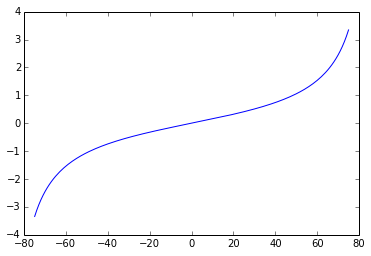

In [28]:
plt.plot(zenith_angles,arcsec(test))

In [29]:
test2 = diff(20., wavelength=wavelength, bandwidth = bandwidth, temperature = temps, 
            atmospheric_pressure = base_pressure_atm)

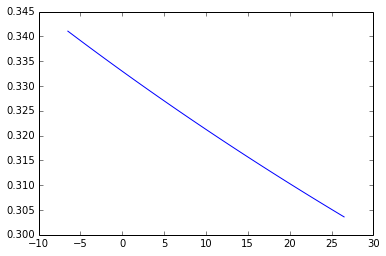

In [30]:
plt.plot(temps,arcsec(test2))

In [31]:
test3 = diff(zenith_angles, wavelength=wavelength, bandwidth = bandwidth, temperature = temps, 
            atmospheric_pressure = base_pressure_atm)

In [32]:
print(test3.shape, type(test3))

((100, 151), <type 'numpy.ndarray'>)


In [33]:
for p_i in range(pressures.size):
    diff_refract_arr[:, :, p_i] = diff(zenith_angles, wavelength=wavelength, bandwidth = bandwidth, 
            temperature = temps, atmospheric_pressure = pressures[p_i])

In [34]:
print(diff_refract_arr.shape, type(diff_refract_arr))

((100, 151, 201), <type 'numpy.ndarray'>)
